In [1]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt


# Question 1

$t = \begin{bmatrix} 2 & 5 & 7 & 8 \end{bmatrix}^T$

$y = \begin{bmatrix} 10 & 20 & 30 & 35 \end{bmatrix}^T$

## 1-a

$W = I_4$

In [2]:
t = np.array([2,5,7,8])
y = np.array([10,20,30,35])

Acol1 = np.ones(4)
Acol2 = t
A = np.column_stack((Acol1,Acol2))
AT = np.transpose(A)

W = np.eye(4)

xhat = inv(AT @ W @ A) @ AT @ W @ y
yhat = A @ xhat

$\hat{x} = \begin{bmatrix} 0.83 & 4.17 \end{bmatrix}^T$

$\hat{y} = \begin{bmatrix} 9.17 & 21.67 & 30 & 34.17 \end{bmatrix}^T$

## 1-b

$y(t=3) = \begin{bmatrix} 1 & 3 \end{bmatrix} \begin{bmatrix} 0.83 \\ 4.17 \\ \end{bmatrix}$

In [3]:
y3sec = np.array([1,3]) @ xhat

$y(t=3) = 13.33$

## 1-c

$W = 4I_4$

In [4]:
W = 4*np.eye(4)
xhat = inv(AT @ W @ A) @ AT @ W @ y

$\hat{x} = \begin{bmatrix} 0.83 & 4.17 \end{bmatrix}^T$

The least squares solution of the initial position and velocity does not vary. Since all the weights are scaled up equally, the relative importance of the individual weights have not varied, resulting in the least-squares solution to be identical.

# Question 2

$$E(\underline{y}) = Ax$$

$$\underline(y) = \begin{bmatrix} y_1 & y_2 & \cdots & y_m \end{bmatrix}^T$$

$$A = \begin{bmatrix} 1 & 1 & \cdots & 1 \end{bmatrix}^T$$

$$Q_y = 2I_m$$

$$W = 5I_m$$

$$(A^TWA)^{-1} = \frac{1}{w_{11} + w_{22} + \cdots + w_{mm}} = \frac{1}{5m}$$

$$Q_{\hat{x}} = \sigma^2_{\hat{x}} = (A^TWA)^{-1}A^TWQ_yWA(A^TWA)^{-1}$$

$$\sigma^2_{\hat{x}} = \frac{1}{5m}\begin{bmatrix} 1 & 1 & \cdots & 1 \end{bmatrix}5I_m2I_m5I_m\begin{bmatrix} 1 & 1 & \cdots & 1 \end{bmatrix}^T\frac{1}{5m}$$

$$\sigma^2_{\hat{x}} = \frac{2m}{m^2}$$

$$m = \frac{2}{\sigma^2_{\hat{x}}}$$

$$ \sigma^2_{\hat{x}} < 0.1; m > 20 $$

# Question 3

$x = \begin{bmatrix} 0 & 2000 & 4000 & 6000 & 8000 \end{bmatrix}^T$

$h = \begin{bmatrix} 50.334 & 50.595 & 51.144 & 55.226 & 58.648 \end{bmatrix}^T$

The model is described by $h = c_0 + c_1(x - x_start)$. The land is flat for $0 < x < 3000$. Therefore for $x < 3000$, $c_1 = 0$. Keeping this in mind, the model matrix is:

$A = \begin{bmatrix} 1 & 0 \\ 1 & 0 \\ 1 & 4000-3000 \\ 1 & 6000-3000 \\ 1 & 8000-3000 \\ \end{bmatrix} = \begin{bmatrix} 1 & 0 \\ 1 & 0 \\ 1 & 1000 \\ 1 & 3000 \\ 1 & 5000 \\ \end{bmatrix}$

In [12]:
x = np.array([0,2000,4000,6000,8000])
h = np.array([50.334, 50.595, 51.144, 55.226, 58.648])

A = np.array([[1, 0], [1, 0], [1, 4000-3000], [1, 6000-3000], [1, 8000-3000]])
AT = np.transpose(A)
c_hat = inv(AT @ A) @ AT @ h
h_hat = A @ c_hat

$\hat{c} = \begin{bmatrix} 50.187 & 0.00167 \end{bmatrix}^T$

$\hat{h} = \begin{bmatrix} 50.187 & 50.187 & 51.855 & 55.191 & 58.527 \end{bmatrix}^T$

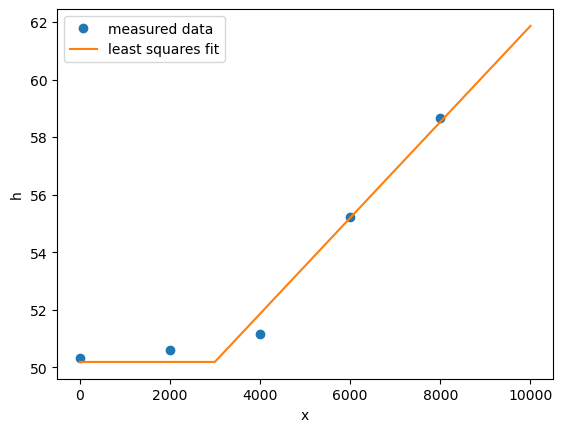

In [6]:
xArr = np.linspace(0, 10000, 101)
c0_Arr = np.ones(101) * c_hat[0]
c1_Arr = np.zeros(101) 
c1_Arr[30:] = c_hat[1]

hArr = c0_Arr + c1_Arr * (xArr - 3000)

fig, ax = plt.subplots()
ax.plot(x, h, 'o', label='measured data')
ax.plot(xArr, hArr, label='least squares fit')
ax.set_xlabel('x')
ax.set_ylabel('h')
ax.legend()

# Question 4

$y = \begin{bmatrix} y_1 & y_2 & \cdots & y_m \end{bmatrix}$

$t = \begin{bmatrix} t_1 & t_2 & \cdots & t_m \end{bmatrix}$

## 4-a

$A = \begin{bmatrix} 1 & t_1 & \sin{\frac{2\pi t_1}{12}} \\ 1 & t_2 & \sin{\frac{2\pi t_2}{12}} \\ \vdots & \vdots & \vdots \\ 1 & t_m & \sin{\frac{2\pi t_m}{12}} \\ \end{bmatrix}$

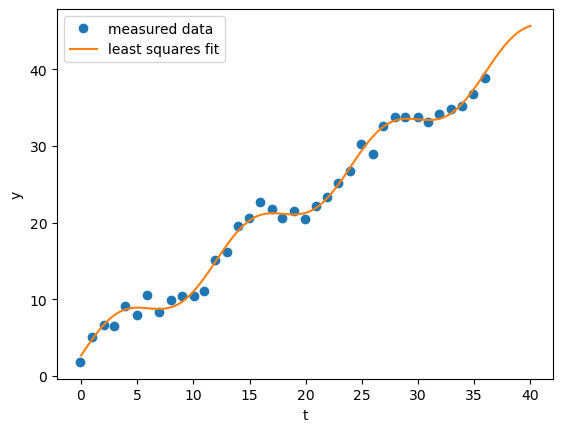

In [13]:
data = np.loadtxt("assgn3P4data.txt")
t = data[:,0]
y = data[:,1]

Acol1 = np.ones(data.shape[0])
Acol2 = t
Acol3 = np.sin(2*np.pi*t/12)

A = np.column_stack((Acol1,Acol2,Acol3))
AT = np.transpose(A)

xhat = inv(AT @ A) @ AT @ y

tArr = np.linspace(0,40,1201)
yArr = xhat[0] + xhat[1]*tArr + xhat[2]*np.sin(2*np.pi*tArr/12)

fig, ax = plt.subplots()
ax.plot(t, y, 'o', label='measured data')
ax.plot(tArr, yArr, label='least squares fit')
ax.set_xlabel('t')
ax.set_ylabel('y')
ax.legend()

## 4-b

$\hat{x} = \begin{bmatrix} 2.656 & 1.027 & 2.220 \end{bmatrix}^T$